# Oversikt

In [3]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
from dhlab.nbtokenizer import tokenize
import dhlab.module_update as mu

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
mu.css()

# N-gram

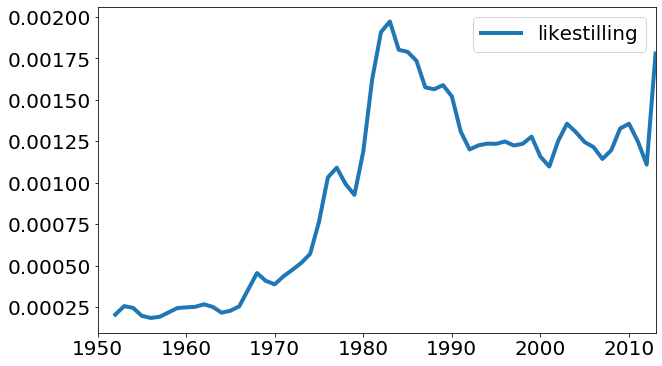

In [81]:
nb.nb_ngram('likestilling', corpus='bok', years = (1950, 2020) ).plot(lw=4, figsize=(10,6))

In [80]:
nb.unigram??

In [85]:

p = nb.unigram('.', media='bok',lang='nno', period = (1950, 2020) )
r = nb.unigram('über', media='bok', lang='nno',  period = (1950, 2020) )
(r/p).plot(lw=4, figsize=(10,6))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Galakser

In [11]:
G = nb.make_graph('demokrati', lang='nob')

### Nettverket

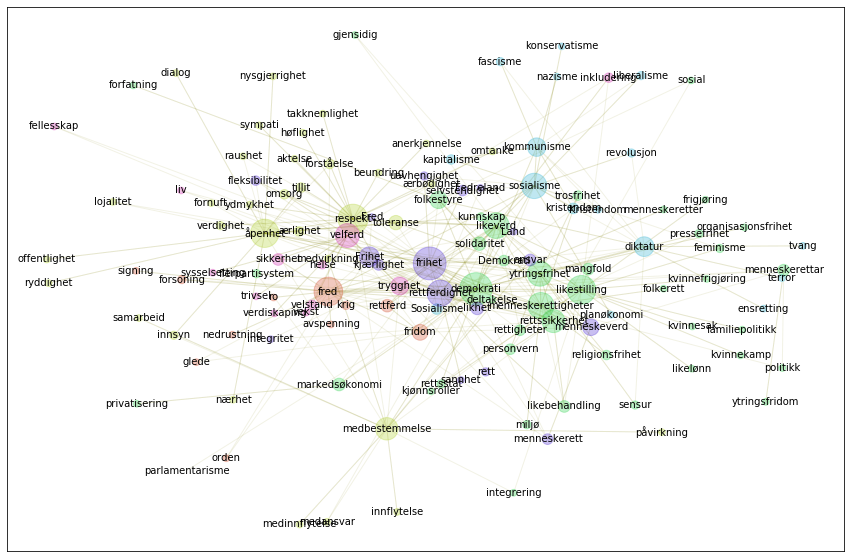

In [15]:
gnl.show_graph(G, spread=1.4)

### Clusteret

In [23]:
comm = gnl.community_dict(G)
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### respekt-åpenhet
<span style='font-size:1.1em'>respekt, åpenhet, medbestemmelse, toleranse, forståelse, ærlighet, tillit, innsyn, verdighet, nysgjerrighet, høflighet, påvirkning, samarbeid, ryddighet, beundring, raushet, nærhet, fornuft, anerkjennelse, aktelse, dialog, ydmykhet, medvirkning, innflytelse, offentlighet, sympati, medansvar, takknemlighet, medinnflytelse, ærbødighet, omtanke, lojalitet</span>
### likestilling-likeverd
<span style='font-size:1.1em'>likestilling, likeverd, solidaritet, mangfold, rettigheter, feminisme, kunnskap, gjensidig, familiepolitikk, kjønnsroller, kvinnefrigjøring, deltakelse, likelønn, frigjøring, kvinnekamp, integrering, kvinnesak</span>
### sosialisme-diktatur
<span style='font-size:1.1em'>sosialisme, diktatur, kommunisme, kristendom, kapitalisme, fascisme, liberalisme, revolusjon, Kristendom, konservatisme, tvang, planøkonomi, terror, ensretting, nazisme</span>
### frihet-rettferdighet
<span style='font-size:1.1em'>frihet, rettferdighet, Frihet, menneskeverd, likhet, ansvar, kjærlighet, menneskerett, selvstendighet, fleksibilitet, uavhengighet, rett, sannhet, Fred, Land, integritet, Fedreland</span>
### demokrati-menneskerettigheter
<span style='font-size:1.1em'>demokrati, menneskerettigheter, ytringsfrihet, rettssikkerhet, folkestyre, markedsøkonomi, likebehandling, menneskerettar, personvern, Demokrati, Sosialisme, religionsfrihet, trosfrihet, sensur, rettsstat, miljø, flerpartisystem, pressefrihet, folkerett, organisasjonsfrihet, politikk, forfatning, menneskeretter, ytringsfridom, sosial, privatisering, parlamentarisme</span>
### velferd-trygghet
<span style='font-size:1.1em'>velferd, trygghet, sikkerhet, omsorg, velstand, inkludering, helse, vekst, fellesskap, verdiskaping, liv, sysselsetting, trivsel</span>
### fred-fridom
<span style='font-size:1.1em'>fred, fridom, rettferd, forsoning, krig, signing, avspenning, glede, ro, nedrustning, orden</span>


# Korpus og bøker

In [25]:
alt = nb.frame(nb.totals(50000), 'tot')

### Toppordene

In [26]:
alt.head(20)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


In [49]:
korpus = nb.book_corpus(lang='nno', limit=40000)

korpus

,urn,author,title,year
0,2010060806090,"Duun, Olav",Det gode samvite,1924
1,2014071608041,,Moms i kommunal sammenheng,1986
2,2012070506126,"Mac Donald, Kirsti",Praktisk norsk,2007
3,2012012308211,,Mønsterplan og lærarutdanning,1972
4,2014120408076,"Wergeland, Håkon",jesoge for lærarskulane,1964
...,...,...,...,...
32286,2015042108241,"Bramness, Hanne",Vintersong,2014
32287,2015042708038,"Osa, Tom Eide",Kunnskap i musikkutøving,2005
32288,2015112708081,"Tveit, Norvald",Fylkesbaatane i Sogn og Fjordane 1958-1983,1983
32289,2012080109057,"Roald, Knut",Kvalitetsvurdering i skuleverket,2003


## Hent teksten

In [46]:
korpus_text = nb.get_corpus_text(list(korpus.urn))

In [47]:
nb.frame_sort(korpus_text, 1).head(20).style.background_gradient()

,2011071106020,2015071308034,2009032404073,2009042104055,2010043003021,2009031604014,2007072401110,2009031004007,2011052408010,2014031705125
.,9249,3353,17048,11450,5912,5923,2727,2346,6668,1629
",",12736,2939,14411,20001,6905,6906,2890,2257,8324,1433
hun,1428,664,1805,6913,1207,1207,1320,574,216,746
og,7139,1101,6846,10851,4524,4524,2239,1692,4566,674
var,4242,279,4062,1549,3485,3486,186,235,423,569
:,1815,457,2005,1994,770,770,172,168,1035,537
jeg,4393,604,5618,1327,4948,4948,117,27,1432,530
i,5352,942,5013,7140,2774,2774,1351,1219,3743,525
til,3948,765,4168,5144,2326,2326,977,823,1920,522
en,4329,731,3983,7421,2365,2364,1242,842,3275,483


In [50]:
from random import sample

In [68]:
refine = nb.refine_book_urn(words=['gravferd'], urns=list(korpus.urn), limit=30000 )
urns = [x[0] for x in sample(refine, max(len(refine), 10))]
urns
nb.urn_concordance(urns = urns, word = 'gravferd')

"Farar i Metropolis og andre essays, Hellesnes, Jon, 1984",få ein kostesam og gild,gravferd,. Management-mennene gjer bruk av
"Randi til rors, Hanssen, Arvid, 1976",trudde visst dette var ei,gravferd,. Men det var kan
"Randi til rors, Hanssen, Arvid, 1976",hende « Havella » si,gravferd,han tenkte på .
"Soria Moria, , 1998",far skulle av stad i,gravferd,. Barna skulle vere åleme
"Sør-Fron førr i ti'n, , 2009",2004.11 Ei enkel,gravferd,i 1933 223
"Sør-Fron førr i ti'n, , 2009",Ei enkel,gravferd,i 1933
"Attersyn, Hovden, Anders, 1926",", Hor Hot ringjer til",gravferd,paa baae sidor » .
"Grindheim, Breilid, Magnus, 1966",stelte enka til ei stor,gravferd,som må ha kosta mykje
"Grindheim, Breilid, Magnus, 1966",og gje henne ei kristsømeleg,gravferd,. For denne semja betalte
"Grindheim, Breilid, Magnus, 1966",levde og så ei skikkeleg,gravferd,.
"seljars død"", Miller, Arthur, 1997",Det var ei riktig vakker,gravferd,.
